In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
crimes=pd.read_excel('2016_epikrateia.xls')
#hold only 2016 year
crimes.drop(crimes.columns[1:6], axis=1, inplace=True)
crimes

,ΕΠΙΚΡΑΤΕΙΑ,2 0 1 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,ΕΓΚΛΗΜΑΤΑ,NaN,NaN,ΔΡΑΣΤΕΣ,NaN
1,NaN,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
2,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95
3,ΑΠΑΤΕΣ,3790,1189,2066,994,247
4,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22
5,ΒΙΑΣΜΟΙ,155,82,164,102,91
6,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55
7,ΕΠΑΙΤΕΙΑ,3115,NaN,2987,1384,1814
8,ΖΩΟΚΛΟΠΗ,577,7,90,82,23
9,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,7076,2,1660,1534,151


## Data Preparation

In [3]:
#we have a small dataset so we can see a row with null only
#and we drop this index, which is 'Ληστείες Δ.Ο.Υ.'
crimes=crimes.drop(crimes.index[32])

In [4]:
#create new attribute names
cols=list(crimes.iloc[1].values)
cols[0]='ΕΓΚΛΗΜΑΤΑ'
crimes.columns=cols
#print dataset after mini tranformation, rearange indexes with the len
#after drop 2 first observations, which are used as columns
crimes.drop([0, 1],inplace=True)
crimes.index=range(len(crimes))
crimes

,ΕΓΚΛΗΜΑΤΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132,183,169,95
1,ΑΠΑΤΕΣ,3790,1189,2066,994,247
2,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19,174,161,22
3,ΒΙΑΣΜΟΙ,155,82,164,102,91
4,ΕΚΒΙΑΣΕΙΣ,135,23,89,100,55
5,ΕΠΑΙΤΕΙΑ,3115,NaN,2987,1384,1814
6,ΖΩΟΚΛΟΠΗ,577,7,90,82,23
7,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,7076,2,1660,1534,151
8,ΛΑΘΡΕΜΠΟΡΙΟ,1425,3,1262,720,893
9,Ν περί ΝΑΡΚΩΤΙΚΩΝ,10892,8,10569,11237,3003


In [5]:
#check if numbers of ΛΗΣΤΕΙΕΣ subclass is equal to the sum of its classes
crimes.iloc[30:].sum()==crimes[crimes['ΕΓΚΛΗΜΑΤΑ']=='ΛΗΣΤΕΙΕΣ']

,ΕΓΚΛΗΜΑΤΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
29,False,True,True,True,True,True


we can see that we have the same numbers, therefore we set the only one null value equal with 0, bacause we do not want to change data value in ΛΗΣΤΕΙΕΣ

In [6]:
#change nan with 0, beacause of sum to all robberies, Ληστείες σε ΕΛ.ΤΑ.
crimes['απόπειρες'][37]=0

In [7]:
#check if numbers of ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ subclass is equal to the sum of its classes
crimes.iloc[24:29].sum()==crimes[crimes['ΕΓΚΛΗΜΑΤΑ']=='ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ']

,ΕΓΚΛΗΜΑΤΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
23,False,True,True,True,True,True


we take true, therefore they are consistent

In [8]:
#check if crimes df has same values as theft_breaks sum
crimes.iloc[15:23].sum()==crimes[crimes['ΕΓΚΛΗΜΑΤΑ']=='ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ']

,ΕΓΚΛΗΜΑΤΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
14,False,True,True,True,True,True


we take true, therefore they are consistent

In [9]:
#value to replace nan values of subclass 'ΕΠΙΚΡΑΤΕΙΑ'
repnan=crimes.iloc[:14]['απόπειρες'].median()

In [10]:
#fill in nan vallues with the median value , because we have 4 nan to απόπειρες feature of subclass ΕΠΙΚΡΑΤΕΙΑ
crimes['απόπειρες'].fillna(value=repnan,inplace=True)

In [11]:
#drop instances from the table, because they are sum instances
crimes.drop(crimes.index[29],inplace=True) #drop 'ΛΗΣΤΕΙΕΣ'
crimes.drop(crimes.index[23],inplace=True) #drop 'ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ'
crimes.drop(crimes.index[14],inplace=True) #drop 'ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ'
crimes.index=range(len(crimes))
crimes

,ΕΓΚΛΗΜΑΤΑ,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ,81,132.0,183,169,95
1,ΑΠΑΤΕΣ,3790,1189.0,2066,994,247
2,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ,155,19.0,174,161,22
3,ΒΙΑΣΜΟΙ,155,82.0,164,102,91
4,ΕΚΒΙΑΣΕΙΣ,135,23.0,89,100,55
5,ΕΠΑΙΤΕΙΑ,3115,16.0,2987,1384,1814
6,ΖΩΟΚΛΟΠΗ,577,7.0,90,82,23
7,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ,7076,2.0,1660,1534,151
8,ΛΑΘΡΕΜΠΟΡΙΟ,1425,3.0,1262,720,893
9,Ν περί ΝΑΡΚΩΤΙΚΩΝ,10892,8.0,10569,11237,3003


we do not have nan values now

## EDA

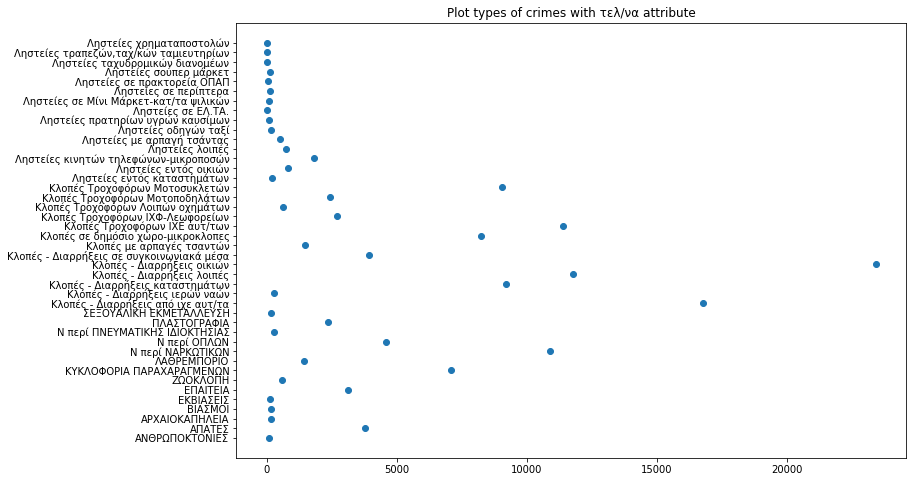

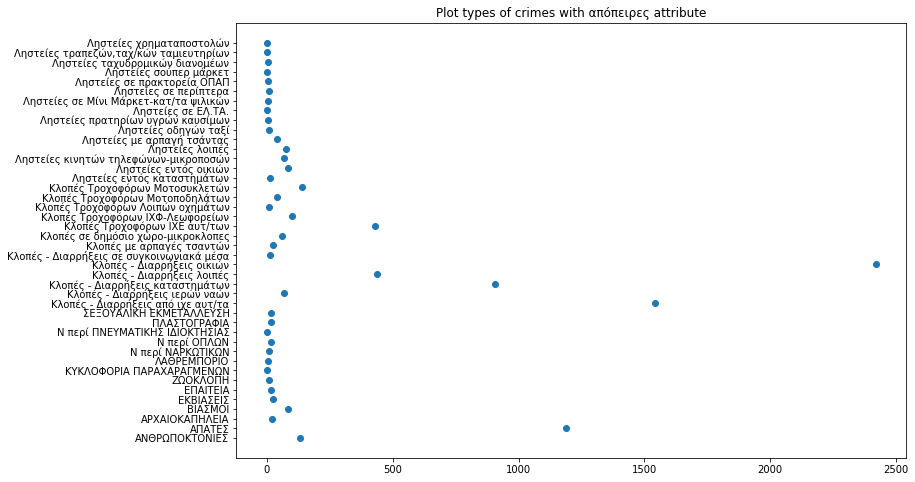

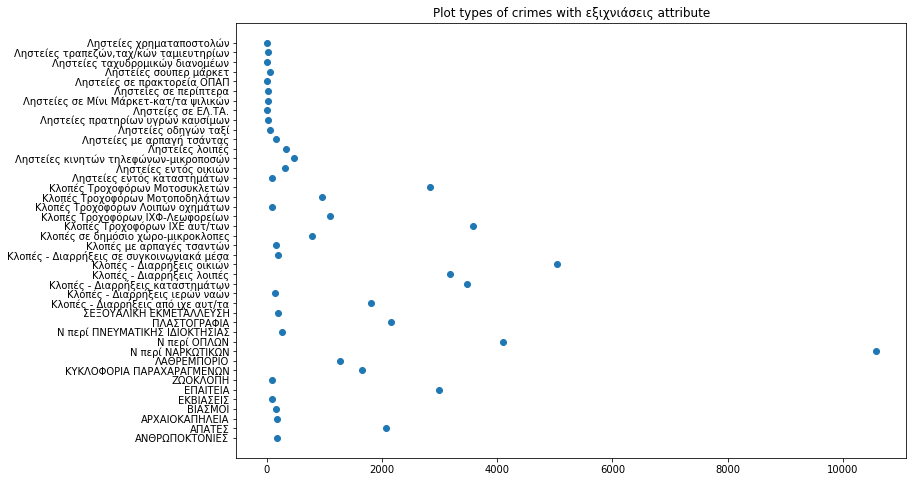

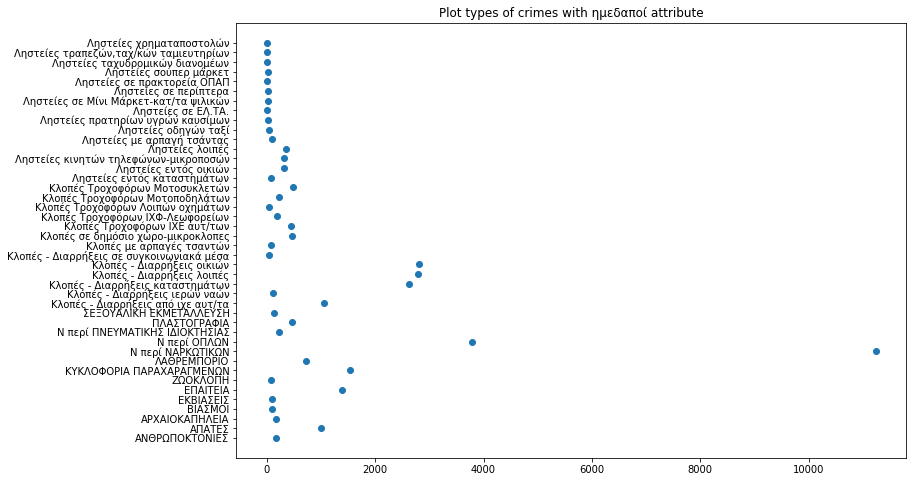

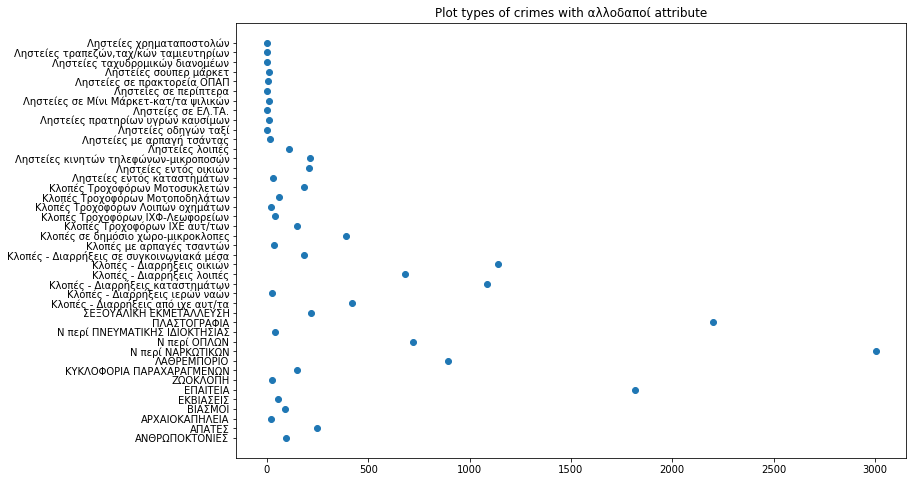

In [12]:
#plot with types of crimes and all attributes, except kind of types
for col in crimes.columns[1:]:
    plt.figure(figsize=(12,8))
    plt.scatter(crimes[col],crimes['ΕΓΚΛΗΜΑΤΑ'])    
    plt.title(f"Plot types of crimes with {col} attribute")  
    plt.show()

In [13]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ΕΓΚΛΗΜΑΤΑ    42 non-null     object 
 1   τελ/να       42 non-null     object 
 2   απόπειρες    42 non-null     float64
 3   εξιχνιάσεις  42 non-null     object 
 4   ημεδαποί     42 non-null     object 
 5   αλλοδαποί    42 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.1+ KB


we will change dtype for all attributes, because we have integers

In [14]:
#change types of values
items=crimes['ΕΓΚΛΗΜΑΤΑ']
crimes=crimes.drop('ΕΓΚΛΗΜΑΤΑ',axis=1).astype(int)

In [15]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   τελ/να       42 non-null     int64
 1   απόπειρες    42 non-null     int64
 2   εξιχνιάσεις  42 non-null     int64
 3   ημεδαποί     42 non-null     int64
 4   αλλοδαποί    42 non-null     int64
dtypes: int64(5)
memory usage: 1.8 KB


In [16]:
crimes.describe()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,3352.523810,191.547619,1211.595238,804.261905,347.690476
std,5224.331028,478.388056,2001.703921,1876.537133,644.076517
min,4.000000,0.000000,1.000000,2.000000,0.000000
25%,140.000000,6.250000,89.250000,45.250000,14.250000
50%,673.000000,16.000000,201.500000,165.000000,76.000000
75%,3903.250000,80.500000,1774.750000,478.250000,239.250000
max,23420.000000,2419.000000,10569.000000,11237.000000,3003.000000


In [17]:
#correlation
crimes.corr()

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί
τελ/να,1.000000,0.792828,0.695043,0.508397,0.444594
απόπειρες,0.792828,1.000000,0.376152,0.200013,0.196558
εξιχνιάσεις,0.695043,0.376152,1.000000,0.925195,0.819234
ημεδαποί,0.508397,0.200013,0.925195,1.000000,0.774923
αλλοδαποί,0.444594,0.196558,0.819234,0.774923,1.000000


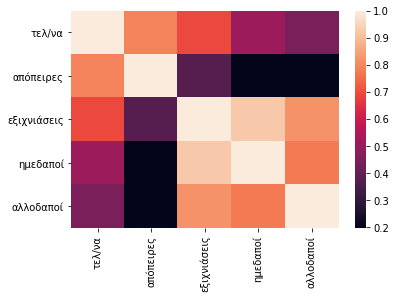

In [18]:
#plot for correlation
sns.heatmap(crimes.corr())

we have huge correlation but this is normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80779efe90>,
      dtype=object)

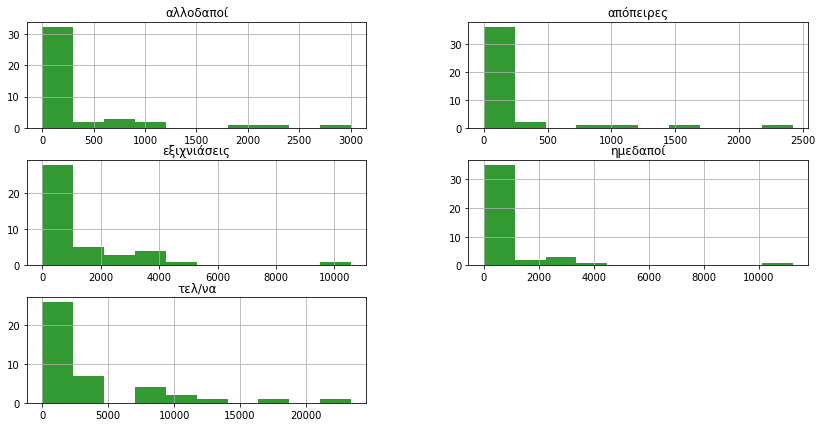

In [19]:
crimes.hist(color='green',bins=10,figsize=(14,7),alpha=0.8)

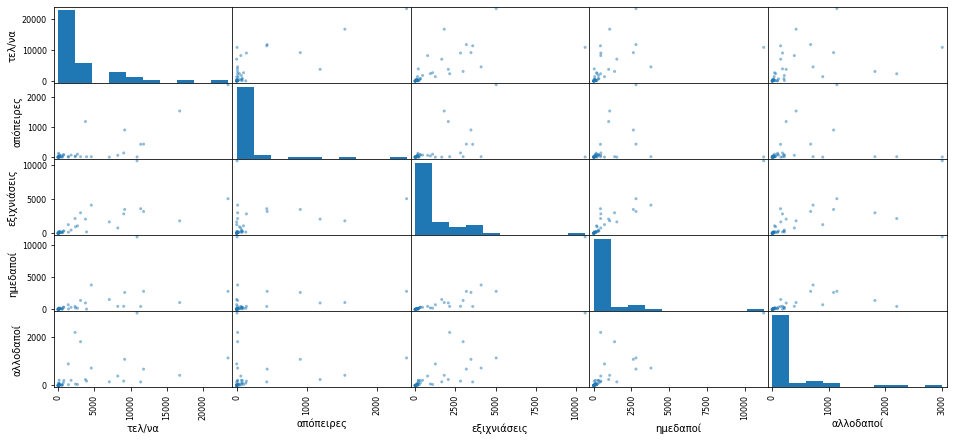

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(crimes,figsize=(16,7))
plt.show()

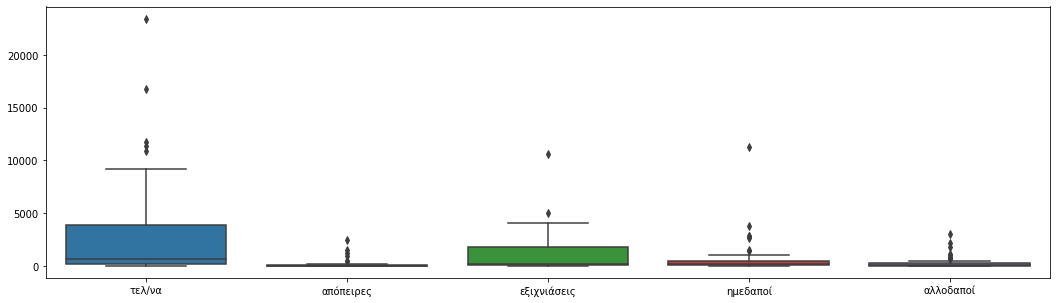

In [21]:
plt.figure(figsize=(18,5))
sns.boxplot(data=crimes)

we can see that we have some outliers, to 'τελ/να' ,'εξιχνιάσεις', 'ημεδαποί' 

### Cluster the types of crimes based on the success of the police in facing/solving them

In [22]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
#we create X for clustering to 2 attributes that they want
X=crimes[['τελ/να','εξιχνιάσεις']]

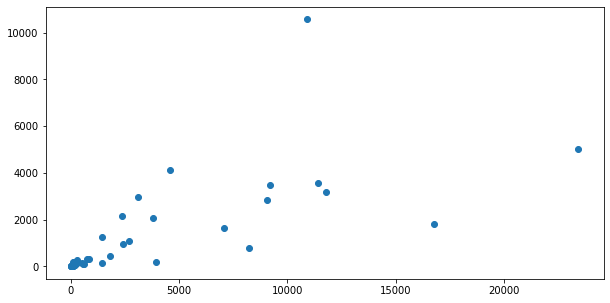

In [24]:
#plot with these values
plt.figure(figsize=(10,5))
plt.scatter(X['τελ/να'],X['εξιχνιάσεις'])

In [25]:
#we will use a scaler for better cluster of data
#scaler=StandardScaler().fit_transform(X) #scaling with mean=0 (gauss dist)
scaler=MinMaxScaler().fit_transform(X) #scaling to (0,1)
scal_X=pd.DataFrame(scaler,columns=X.columns)

# print scaled dataset
X=scal_X

In [26]:
#function to plot Silhouette coefficient
def silhouette_score(X, preds):
    from sklearn.metrics import silhouette_samples
    from matplotlib import cm
    
    cluster_labels = np.unique(preds)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X,preds,metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[preds==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(yticks,cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

0    35
1     7
dtype: int64 



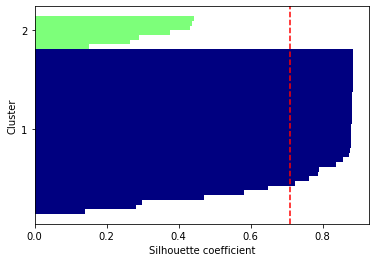

silhouette_score:  0.7107482363513562 


0    32
1     9
2     1
dtype: int64 



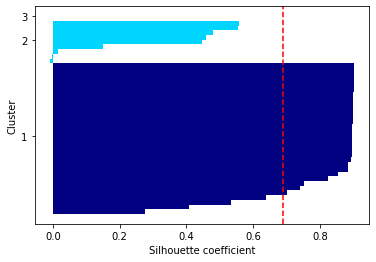

silhouette_score:  0.6904285155321344 


1    30
3     9
0     2
2     1
dtype: int64 



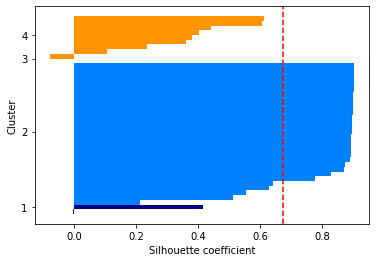

silhouette_score:  0.6729566660766595 


0    29
4     6
2     5
3     1
1     1
dtype: int64 



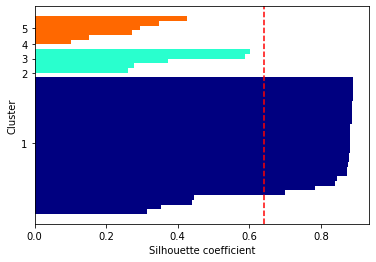

silhouette_score:  0.6420357575376857 


0    29
3     6
5     4
4     1
2     1
1     1
dtype: int64 



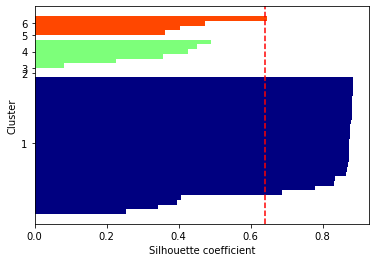

silhouette_score:  0.6400999406531515 


0    29
6     4
5     4
3     2
4     1
2     1
1     1
dtype: int64 



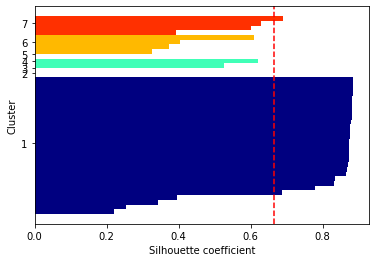

silhouette_score:  0.6654462984188163 


0    24
7     5
3     4
1     4
5     2
6     1
4     1
2     1
dtype: int64 



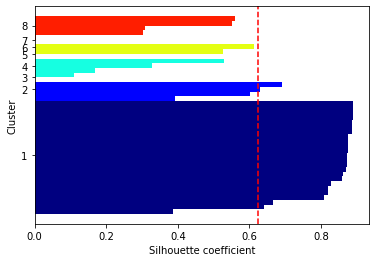

silhouette_score:  0.624058855821549 


0    24
7     5
1     4
3     3
5     2
8     1
6     1
4     1
2     1
dtype: int64 



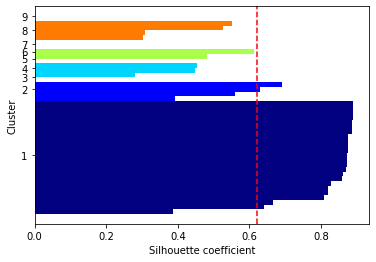

silhouette_score:  0.6223411369812295 




In [27]:
#for that calculates and plots Silhouette coefficient  for kmeans with 9 different numbers 2-10
for i in range(2,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(X)
    kmeans.cluster_centers_
    preds = kmeans.fit_predict(X)
    print(pd.Series(preds).value_counts(),'\n')
    silhouette_score(X, preds)
    print('silhouette_score: ',metrics.silhouette_score(X, preds), '\n\n')


In [28]:
#we can see that we have better scores with k=2 and k=3, 
#but clusters are imbalanced in any itteration 
#and the majority of the clusters except the biggest have values under silhouette_score. 
#So, this seems to be a relatively bad clustering. But let's design them, to see them better

0    35
1     7
dtype: int64


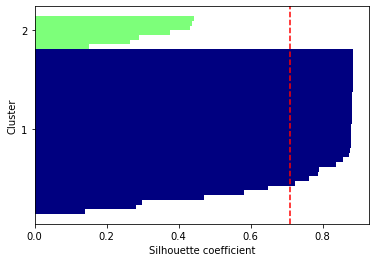

silhouette_score:  0.7107482363513562 




In [29]:
#clustering with kmeans to 'τελ/να', 'εξιχνιάσεις' attributes
i=2
kmeans = KMeans(n_clusters = i,random_state = 0)
kmeans.fit(X)
kmeans.cluster_centers_
preds = kmeans.fit_predict(X)
print(pd.Series(preds).value_counts())
silhouette_score(X, preds)
print('silhouette_score: ',metrics.silhouette_score(X, preds), '\n\n')

In [30]:
#frame with kmeans clusters prediction
kmeans_X = X.copy()
kmeans_X['KMeans_Clusters'] = preds
kmeans_X['ΕΓΚΛΗΜΑΤΑ']=items
kmeans_X

,τελ/να,εξιχνιάσεις,KMeans_Clusters,ΕΓΚΛΗΜΑΤΑ
0,0.003288,0.017222,0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ
1,0.161684,0.195401,0,ΑΠΑΤΕΣ
2,0.006449,0.016370,0,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ
3,0.006449,0.015424,0,ΒΙΑΣΜΟΙ
4,0.005594,0.008327,0,ΕΚΒΙΑΣΕΙΣ
5,0.132858,0.282551,0,ΕΠΑΙΤΕΙΑ
6,0.024470,0.008422,0,ΖΩΟΚΛΟΠΗ
7,0.302016,0.156983,0,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ
8,0.060685,0.119322,0,ΛΑΘΡΕΜΠΟΡΙΟ
9,0.464981,1.000000,1,Ν περί ΝΑΡΚΩΤΙΚΩΝ


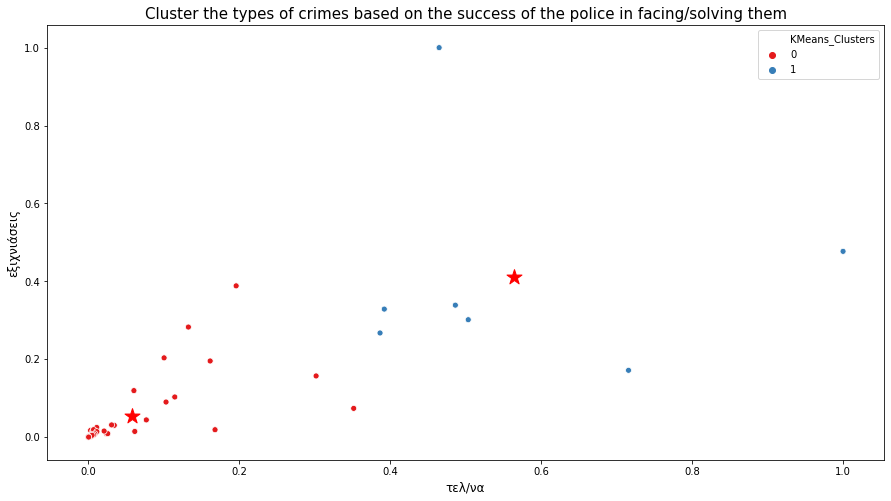

In [31]:
#visulization of clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(kmeans_X['τελ/να'],kmeans_X['εξιχνιάσεις'], hue='KMeans_Clusters',data=kmeans_X,palette='Set1') 
plt.title('Cluster the types of crimes based on the success of the police in facing/solving them', fontsize=15)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,c='red',marker='*',label='centroids')
plt.xlabel('τελ/να', fontsize=12)
plt.ylabel('εξιχνιάσεις', fontsize=12)
plt.show()

In [32]:
#for dbscan we have eps and MinPts for parameters. 
#The larger the data set, the larger the value of MinPts should be.

In [33]:
#to find better eps value we use NearestNeighbors and k-distance elbow
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

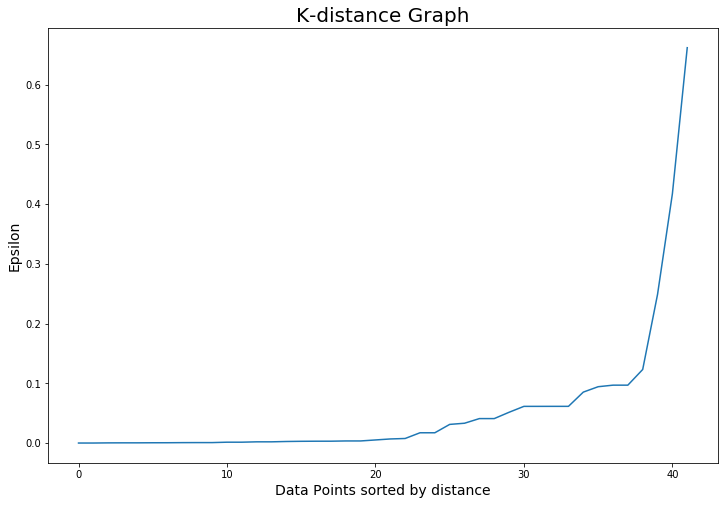

In [34]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [35]:
#we should find the value where the line becomes almost vertical and we choose the value for eps

In [36]:
model=DBSCAN(eps=0.2,min_samples=4,metric='euclidean')
preds=model.fit_predict(X)
preds

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

 0    39
-1     3
dtype: int64


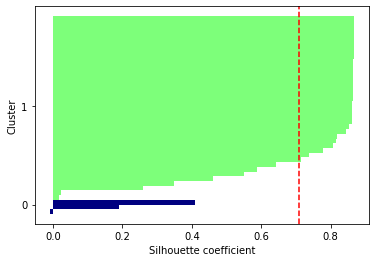

silhouette_score:  0.7076997605746872 




In [37]:
#score and silhouette coefficients
print(pd.Series(preds).value_counts()) #clusters
silhouette_score(X, preds)
print('silhouette_score: ',metrics.silhouette_score(X, preds), '\n\n')

In [38]:
#frame with DBSCAN clusters prediction
DBSCAN_X = X.copy()
DBSCAN_X['DBSCAN_Clusters'] = preds
DBSCAN_X['ΕΓΚΛΗΜΑΤΑ']=items
DBSCAN_X

,τελ/να,εξιχνιάσεις,DBSCAN_Clusters,ΕΓΚΛΗΜΑΤΑ
0,0.003288,0.017222,0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ
1,0.161684,0.195401,0,ΑΠΑΤΕΣ
2,0.006449,0.016370,0,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ
3,0.006449,0.015424,0,ΒΙΑΣΜΟΙ
4,0.005594,0.008327,0,ΕΚΒΙΑΣΕΙΣ
5,0.132858,0.282551,0,ΕΠΑΙΤΕΙΑ
6,0.024470,0.008422,0,ΖΩΟΚΛΟΠΗ
7,0.302016,0.156983,0,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ
8,0.060685,0.119322,0,ΛΑΘΡΕΜΠΟΡΙΟ
9,0.464981,1.000000,-1,Ν περί ΝΑΡΚΩΤΙΚΩΝ


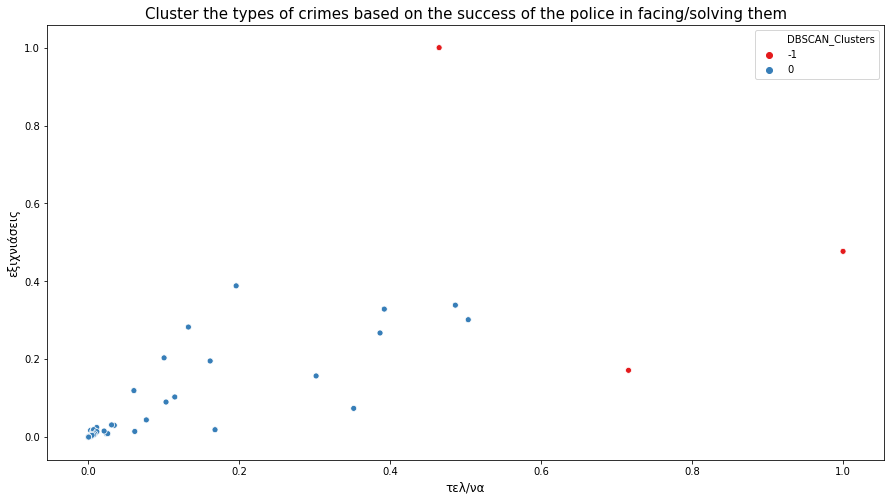

In [39]:
#visulization of clusters
plt.figure(figsize=(15,8))
sns.scatterplot(DBSCAN_X['τελ/να'],DBSCAN_X['εξιχνιάσεις'], hue='DBSCAN_Clusters',data=DBSCAN_X,palette='Set1') 
plt.title('Cluster the types of crimes based on the success of the police in facing/solving them', fontsize=15)
plt.xlabel('τελ/να', fontsize=12)
plt.ylabel('εξιχνιάσεις', fontsize=12)
plt.show()

In [40]:
#we can see that we have 1 class and 3 outliers with MinMaxScaler().
#without scaling 2 clusters and 3 outliers too.
#better clustering than kmeans before.

### Cluster the types of crimes and explain what each cluster represents.

In [41]:
Y=crimes.copy()

In [42]:
#we will use a scaler for better cluster of data
#scaler=StandardScaler().fit_transform(Y) #scaling with mean=0 (gauss dist)
scaler=MinMaxScaler().fit_transform(Y) #scaling to (0,1)
scal_Y=pd.DataFrame(scaler,columns=Y.columns)

# print scaled dataset
Y=scal_Y

0    33
1     9
dtype: int64 



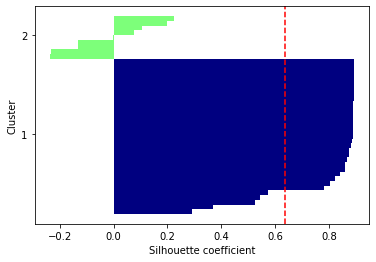

silhouette_score:  0.633754972093914 


2    35
0     6
1     1
dtype: int64 



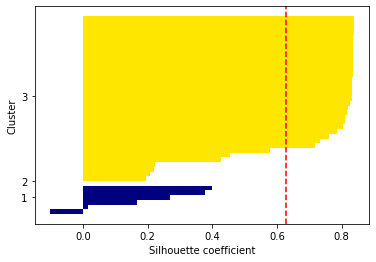

silhouette_score:  0.6273055542732282 


1    29
3    10
0     2
2     1
dtype: int64 



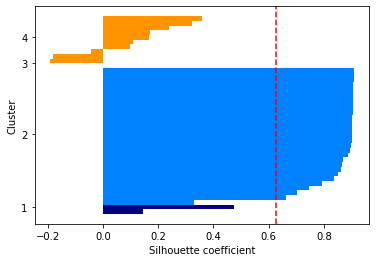

silhouette_score:  0.6271900585010743 


0    29
1     8
4     2
2     2
3     1
dtype: int64 



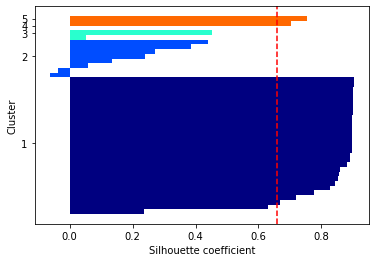

silhouette_score:  0.6596939620187958 


1    29
3     6
5     2
4     2
0     2
2     1
dtype: int64 



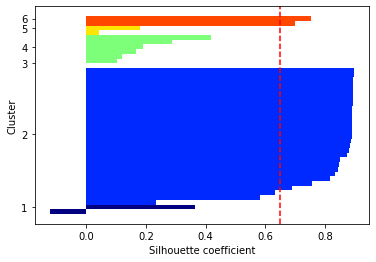

silhouette_score:  0.6476485065964698 


0    29
4     5
3     3
5     2
6     1
2     1
1     1
dtype: int64 



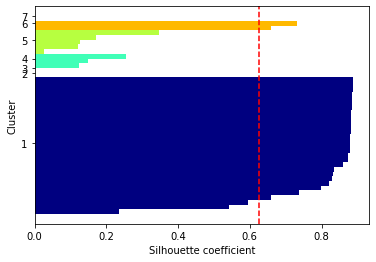

silhouette_score:  0.6268861934031483 


0    29
5     4
1     3
4     2
7     1
6     1
3     1
2     1
dtype: int64 



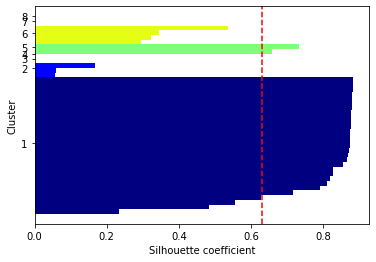

silhouette_score:  0.6308829703288223 


0    29
5     4
4     2
1     2
8     1
7     1
6     1
3     1
2     1
dtype: int64 



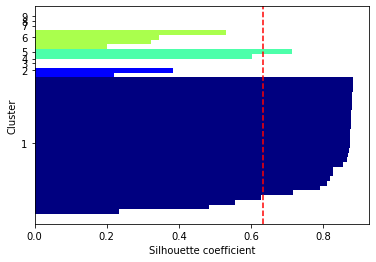

silhouette_score:  0.6344228343437847 




In [43]:
#for that calculates and plots Silhouette coefficient  for kmeans with 9 different numbers 2-10
for i in range(2,10):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(Y)
    kmeans.cluster_centers_
    preds = kmeans.fit_predict(Y)
    print(pd.Series(preds).value_counts(),'\n')
    silhouette_score(Y, preds)
    print('silhouette_score: ',metrics.silhouette_score(Y, preds), '\n\n')

In [44]:
#we can see that number k=5 is the best silhouette_score
#but clusters are imbalanced in any itteration 
#and the majority of the clusters except the biggest one, they have values under silhouette_score. 
#So, this seems to be a relatively bad clustering. But let's design them, to see them better

0    29
4     8
2     2
1     2
3     1
dtype: int64


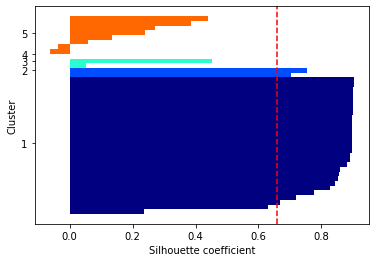

silhouette_score:  0.6596939620187958 




In [45]:
#clustering with kmeans
i=5
kmeans = KMeans(n_clusters = i,random_state = 10)
kmeans.fit(Y)
kmeans.cluster_centers_
preds = kmeans.fit_predict(Y)
print(pd.Series(preds).value_counts())
silhouette_score(Y, preds)
print('silhouette_score: ',metrics.silhouette_score(Y, preds), '\n\n')

In [46]:
#frame with kmeans clusters prediction
kmeans_Y = Y.copy()
kmeans_Y['KMeans_Clusters'] = preds
kmeans_Y['ΕΓΚΛΗΜΑΤΑ']=items
kmeans_Y

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,KMeans_Clusters,ΕΓΚΛΗΜΑΤΑ
0,0.003288,0.054568,0.017222,0.014864,0.031635,0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ
1,0.161684,0.491525,0.195401,0.088296,0.082251,4,ΑΠΑΤΕΣ
2,0.006449,0.007854,0.016370,0.014152,0.007326,0,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ
3,0.006449,0.033898,0.015424,0.008901,0.030303,0,ΒΙΑΣΜΟΙ
4,0.005594,0.009508,0.008327,0.008723,0.018315,0,ΕΚΒΙΑΣΕΙΣ
5,0.132858,0.006614,0.282551,0.123008,0.604063,1,ΕΠΑΙΤΕΙΑ
6,0.024470,0.002894,0.008422,0.007121,0.007659,0,ΖΩΟΚΛΟΠΗ
7,0.302016,0.000827,0.156983,0.136360,0.050283,4,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ
8,0.060685,0.001240,0.119322,0.063907,0.297369,0,ΛΑΘΡΕΜΠΟΡΙΟ
9,0.464981,0.003307,1.000000,1.000000,1.000000,3,Ν περί ΝΑΡΚΩΤΙΚΩΝ


In [47]:
#Not a good prediction. Let's see with DBSCAN

In [48]:
#to find better eps value we use NearestNeighbors and k-distance elbow
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(Y)
distances, indices = neighbors_fit.kneighbors(Y)

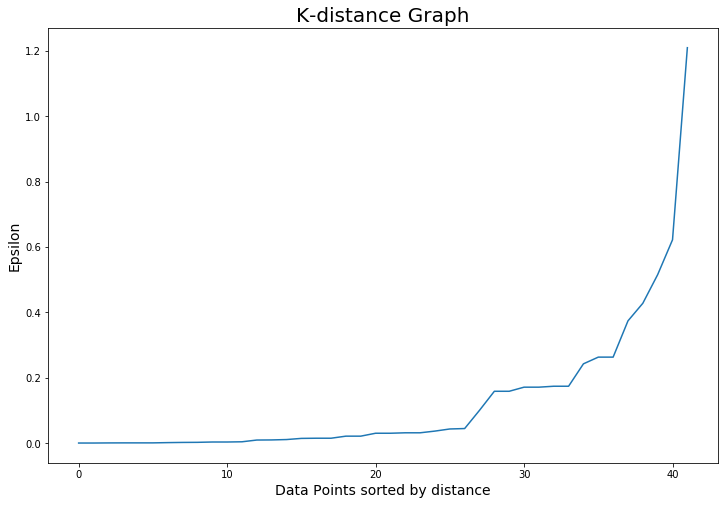

In [49]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,8))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [50]:
#create the model with eps=0.2, to create more than one clusters
model=DBSCAN(eps=0.2,min_samples=2,metric='euclidean')
preds=model.fit_predict(Y)
preds

array([ 0, -1,  0,  0,  0,  1,  0,  2, -1, -1, -1,  0,  1,  0, -1,  0, -1,
       -1, -1,  0,  0,  2,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

 0    28
-1     8
 2     4
 1     2
dtype: int64


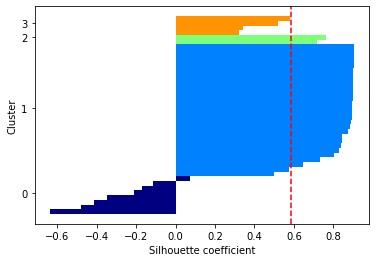

silhouette_score:  0.5857900581017681 




In [51]:
#score and silhouette coefficients
print(pd.Series(preds).value_counts()) #clusters
silhouette_score(Y, preds)
print('silhouette_score: ',metrics.silhouette_score(Y, preds), '\n\n')

In [52]:
#frame with DBSCAN clusters prediction
DBSCAN_Y = crimes.copy()
DBSCAN_Y['KMeans_Clusters'] = preds
DBSCAN_Y['ΕΓΚΛΗΜΑΤΑ']=items
DBSCAN_Y

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,KMeans_Clusters,ΕΓΚΛΗΜΑΤΑ
0,81,132,183,169,95,0,ΑΝΘΡΩΠΟΚΤΟΝΙΕΣ
1,3790,1189,2066,994,247,-1,ΑΠΑΤΕΣ
2,155,19,174,161,22,0,ΑΡΧΑΙΟΚΑΠΗΛΕΙΑ
3,155,82,164,102,91,0,ΒΙΑΣΜΟΙ
4,135,23,89,100,55,0,ΕΚΒΙΑΣΕΙΣ
5,3115,16,2987,1384,1814,1,ΕΠΑΙΤΕΙΑ
6,577,7,90,82,23,0,ΖΩΟΚΛΟΠΗ
7,7076,2,1660,1534,151,2,ΚΥΚΛΟΦΟΡΙΑ ΠΑΡΑΧΑΡΑΓΜΕΝΩΝ
8,1425,3,1262,720,893,-1,ΛΑΘΡΕΜΠΟΡΙΟ
9,10892,8,10569,11237,3003,-1,Ν περί ΝΑΡΚΩΤΙΚΩΝ


In [53]:
#We can observe that he has put the robberies in the same category all. 
#It has also categorized 8 outliers values, where τελ/να>10000 most of them.
#we have not a good classification at the other classes.

### Identify outliers in crime types and explain what they represent/why they are outliers.

In [54]:
from sklearn.neighbors import LocalOutlierFactor
#scaling of data to find outliers
scaler=MinMaxScaler().fit_transform(crimes.copy())
cr=pd.DataFrame(scaler,columns=crimes.columns)

#algorithm to find outliers, LocalOutlierFactor
preds = LocalOutlierFactor(n_neighbors=2).fit_predict(cr)
cr['predict']=preds   
cr = cr[cr.predict == -1] #outliers where we have -1 value
cr['ΕΓΚΛΗΜΑΤΑ']=items
cr

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,predict,ΕΓΚΛΗΜΑΤΑ
1,0.161684,0.491525,0.195401,0.088296,0.082251,-1,ΑΠΑΤΕΣ
8,0.060685,0.001240,0.119322,0.063907,0.297369,-1,ΛΑΘΡΕΜΠΟΡΙΟ
9,0.464981,0.003307,1.000000,1.000000,1.000000,-1,Ν περί ΝΑΡΚΩΤΙΚΩΝ
10,0.196105,0.006614,0.388342,0.336716,0.240426,-1,Ν περί ΟΠΛΩΝ
14,0.715835,0.637040,0.171461,0.094437,0.140526,-1,Κλοπές - Διαρρήξεις από ιχε αυτ/τα
18,1.000000,1.000000,0.476911,0.249132,0.380286,-1,Κλοπές - Διαρρήξεις οικιών
19,0.168133,0.005374,0.018925,0.003827,0.060606,-1,Κλοπές - Διαρρήξεις σε συγκοινωνιακά μέσα
20,0.061838,0.009921,0.014478,0.006231,0.011655,-1,Κλοπές με αρπαγές τσαντών
27,0.008968,0.005374,0.008422,0.007032,0.009657,-1,Ληστείες εντός καταστημάτων
32,0.007217,0.003721,0.005678,0.003649,0.000999,-1,Ληστείες οδηγών ταξί


In [55]:
#scaling of data to find outliers
scaler=MinMaxScaler().fit_transform(crimes.copy())
cr=pd.DataFrame(scaler,columns=crimes.columns)

#find outliers with DBSCAN
preds= DBSCAN(eps=0.5,min_samples=2,metric='euclidean').fit_predict(cr)
cr['predict']=preds   
cr = cr[cr.predict == -1] #outliers where we have -1 value
cr['ΕΓΚΛΗΜΑΤΑ']=items
cr

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,predict,ΕΓΚΛΗΜΑΤΑ
9,0.464981,0.003307,1.000000,1.000000,1.000000,-1,Ν περί ΝΑΡΚΩΤΙΚΩΝ
14,0.715835,0.637040,0.171461,0.094437,0.140526,-1,Κλοπές - Διαρρήξεις από ιχε αυτ/τα
18,1.000000,1.000000,0.476911,0.249132,0.380286,-1,Κλοπές - Διαρρήξεις οικιών


In [56]:
#with eps=0.5 we we have 3 outliers 
#with eps=0.7 we we have 1 outlier, Ν περί ΝΑΡΚΩΤΙΚΩΝ

In [57]:
from sklearn.ensemble import IsolationForest
cr=crimes.copy()
#contamination is the percentile in data that we chose for outliers
preds = IsolationForest(contamination = 0.05).fit_predict(cr)
cr['predict']=preds   
cr = cr[cr.predict == -1] #outliers where we have -1 value
cr['ΕΓΚΛΗΜΑΤΑ']=items
cr

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,predict,ΕΓΚΛΗΜΑΤΑ
9,10892,8,10569,11237,3003,-1,Ν περί ΝΑΡΚΩΤΙΚΩΝ
14,16766,1541,1813,1063,422,-1,Κλοπές - Διαρρήξεις από ιχε αυτ/τα
18,23420,2419,5041,2801,1142,-1,Κλοπές - Διαρρήξεις οικιών


In [58]:
#with contamination = 0.05 or 5%, we have 3 outliers 
#with contamination = 0.01 or 1%, we have 1 outlier , Ν περί ΝΑΡΚΩΤΙΚΩΝ

### Try to predict the super-category of a record given only its numeric fields, providing an explanation of the main factors for the decision and report the performance on a cross-validation evaluation.

we have a classification problem, so we use classifiers. 

In [59]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [60]:
#find length of classes and create a list with the class of each instance
a=len(items[:14])*[0] #class ΕΠΙΚΡΑΤΕΙΑ
b=len(items[14:22])*[1]#class Κλοπές - Διαρρήξεις
c=len(items[22:27])*[2] #class Κλοπές Τροχοφόρων
d=len(items[27:])*[3] #class Ληστείες
classes=a+b+c+d

#create class as superclasses
crime=crimes.copy()
crime['class']=classes
crime

,τελ/να,απόπειρες,εξιχνιάσεις,ημεδαποί,αλλοδαποί,class
0,81,132,183,169,95,0
1,3790,1189,2066,994,247,0
2,155,19,174,161,22,0
3,155,82,164,102,91,0
4,135,23,89,100,55,0
5,3115,16,2987,1384,1814,0
6,577,7,90,82,23,0
7,7076,2,1660,1534,151,0
8,1425,3,1262,720,893,0
9,10892,8,10569,11237,3003,0


In [61]:
#split dataset to target value and the attributes features
X_train=crime.drop('class',axis=1)
y_train=crime['class']

In [62]:
from sklearn.model_selection import GridSearchCV
#grid search for the decision tree
tree = DecisionTreeClassifier(random_state=15)
grid_param = {'criterion':['gini', 'entropy'], 'max_depth':range(2,15)}
gd_sr = GridSearchCV(estimator=tree,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_) #best parameters
print(gd_sr.best_score_) #best score of tree

{'criterion': 'gini', 'max_depth': 6}
0.7583333333333333


In [63]:
#create the decision tree with these parameters
tree = DecisionTreeClassifier(random_state=15, criterion='gini', max_depth=6)
#create RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=10)
#create random forest classifier
rf = RandomForestClassifier(random_state=10, n_estimators=100, max_features=2)

In [64]:
#accuracy with random forest
result = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Test Accuracy: %.3f%% (+/- %f)" % (result.mean()*100, result.std()))

Test Accuracy: 78.000% (+/- 0.146116)


In [65]:
#accuracy for decision tree with cross validation and std
result = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("Accuracy: %.3f%% (+/- %f)" % (result.mean()*100, result.std()))

Accuracy: 79.250% (+/- 0.215218)


In [66]:
preds = cross_val_predict(tree, X_train, y_train, cv=15)

cv: For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.62      0.62      0.62         8
           2       0.50      0.60      0.55         5
           3       0.93      0.93      0.93        15

    accuracy                           0.79        42
   macro avg       0.73      0.74      0.73        42
weighted avg       0.79      0.79      0.79        42



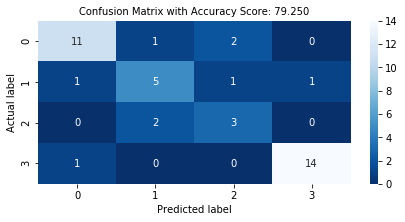

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
#fit tree
tree.fit(X_train, y_train)
#classification report
print(classification_report(y_train,preds))
#confusion matrix on heatmap
matrix = confusion_matrix(y_train,preds)
plt.figure(figsize=(7,3))
sns.heatmap(matrix, annot=True, fmt='.5g', cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = f'Confusion Matrix with Accuracy Score: {result.mean()*100:.3f}'
plt.title(title, size = 10);

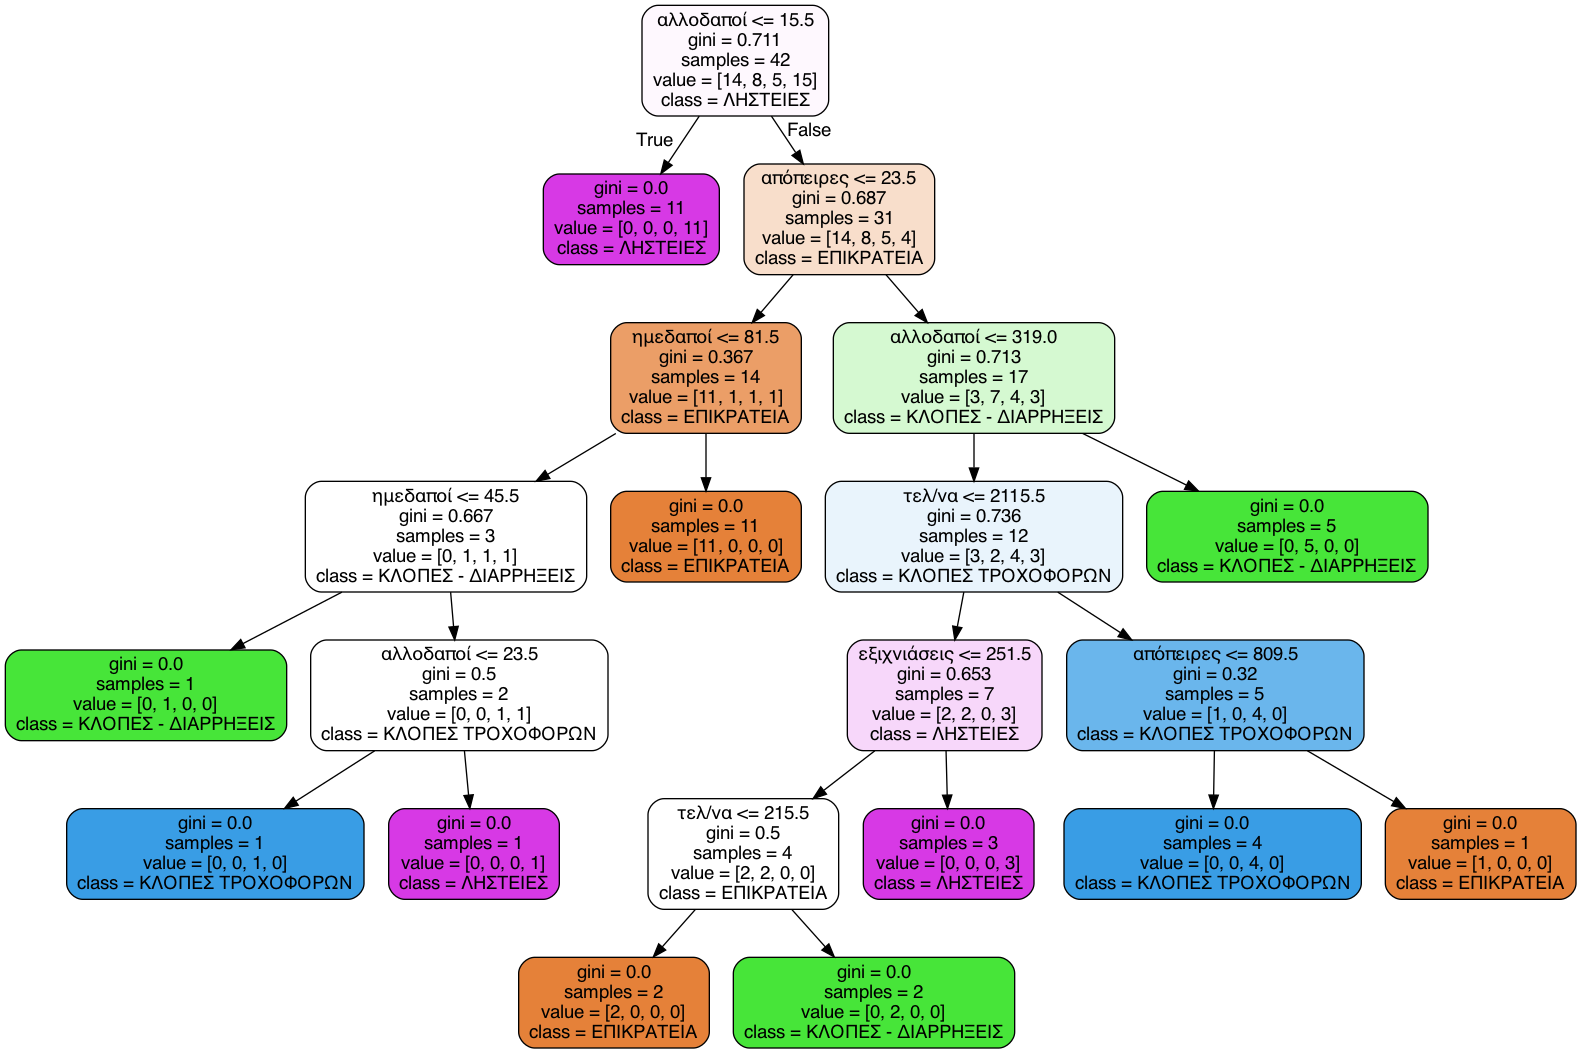

In [68]:
#Visualization of tree
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(tree, out_file=None,
    feature_names=['τελ/να','απόπειρες','εξιχνιάσεις','ημεδαποί','αλλοδαποί'],  
    class_names=['ΕΠΙΚΡΑΤΕΙΑ', 'ΚΛΟΠΕΣ - ΔΙΑΡΡΗΞΕΙΣ', 'ΚΛΟΠΕΣ ΤΡΟΧΟΦΟΡΩΝ', 'ΛΗΣΤΕΙΕΣ'],  
    filled=True,
    rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())